<h1><center>Data Analyst Project - App Rating Prediction</center></h1>
<hr>
Submitted by: Yanda Sebega <br>
Date: 15/07/2022 <br>
Module: Programming Basics and Data Analytics with Python <br>
Institution: Simplilearn Solutions <br>

<h3>Import relevant librairies</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline

<h3>1. Load the dataset</h3>

In [2]:
df = pd.read_csv('googleplaystore.csv')

In [3]:
df.shape

(10841, 13)

<h3>2. Check for null values in the data. Get the number of null values for each column.</h3>

In [4]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

<h3>3. Drop records with nulls in any of the columns.</h3>

In [5]:
df.shape

(10841, 13)

In [6]:
df.dropna(how='any', inplace=True)

In [7]:
df.shape

(9360, 13)

<h3>4. Inconsistent formatting</h3>

In [8]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


<h4>4.1 Size</h4>

In [10]:
len(df[df.Size=='Varies with device'])

1637

In [11]:
# The value 'Varies with device' is present is many observations.
# We are replacing it with 0M
df = df.replace('Varies with device', '0M')

In [12]:
df['Size'].str[-1].unique()

array(['M', 'k'], dtype=object)

In [13]:
# Size column has sizes in Kb as well as Mb.
# Extract the numeric value from the column
# Multiply the value by 1,000, if size is mentioned in Mb

df['Size'] = df.Size.str.replace('k',"").str.replace('M',"")
df['Kb'] = df.Size.str.find('k')
df.Size =  df.Size.astype('float')
df['Size'] = np.where(df.Kb>=0,(df.Size*1024),df.Size)

In [14]:
df = df.drop(columns=['Kb'])

In [15]:
len(df)

9360

<h4>4.2. Reviews (Convert into numeric)</h4>

In [16]:
#Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).
df['Reviews'] = df['Reviews'].astype('int')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   int32  
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(2), int32(1), object(10)
memory usage: 987.2+ KB


<h4>4.3. Installs (to numeric and remove +) </h4>

In [18]:
# Treat 1,000,000+ as 1000000
# Remove ‘+’, ‘,’ from the field, convert it to integer
df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',', '').astype('int')

<h4>4.4. Price (Remove $ sign)</h4>

In [19]:
#Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.
df['Price'] = df['Price'].str.replace('$', '').astype('float')

In [20]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


<h3>5. Sanity checks</h3>

In [21]:
# 1. Average rating sanity check
# Average rating should be between 1 and 5 as only these values are allowed on the play store. 
df[df.Rating < 1]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [22]:
df[df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [23]:
# 2. Reviews vs installs sanity check
len(df[df['Reviews'] > df['Installs']])

7

In [24]:
# Drop the rows that have a value outside this range (1 and 5).
df.drop(df[df['Reviews'] > df['Installs']].index, inplace=True)

In [25]:
# Check that lines are dropped
len(df[df['Reviews'] > df['Installs']])

0

In [26]:
# 3. For free apps (type = “Free”), the price should not be >0. Drop any such rows.
# all free type
free = df['Type'] == 'Free'
# price above zero
zero = df['Price'] > 0
# boolean indexing to get the results
df[(free & zero)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


<h3>6. Perform univariate analysis</h3>

{'whiskers': [<matplotlib.lines.Line2D at 0x1c88bcf2188>,
 'caps': [<matplotlib.lines.Line2D at 0x1c88bd4ad88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c88bd45608>],
 'medians': [<matplotlib.lines.Line2D at 0x1c88bd55f48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c88bd55ec8>],
 'means': []}

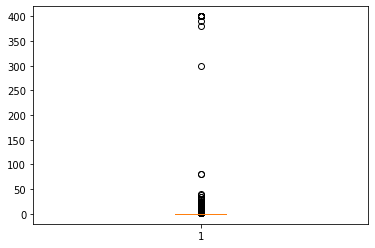

In [27]:
# Boxplot of Price
plt.boxplot(df['Price'])

Are there any outliers? Think about the price of usual apps on Play Store.
We see few data points way above the price of 100. These are outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x1c88bbc3208>,
 'caps': [<matplotlib.lines.Line2D at 0x1c88bbbf288>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c88bbc3bc8>],
 'medians': [<matplotlib.lines.Line2D at 0x1c88bbbb308>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c88bbbb248>],
 'means': []}

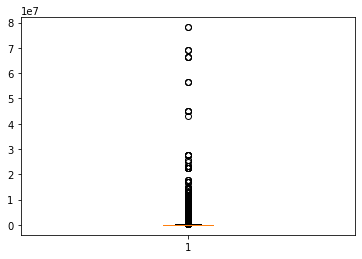

In [28]:
# Boxplot of Reviews
plt.boxplot(df['Reviews'])

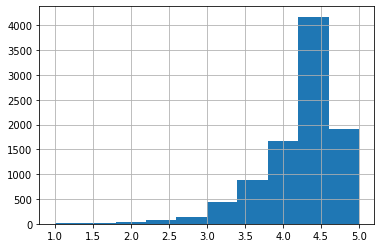

In [29]:
# Histogram of Rating
df['Rating'].hist()

How are the ratings distributed? Is it more toward higher ratings?
The ratings are left-skewed. This is an indication that users like the applications they purchased.

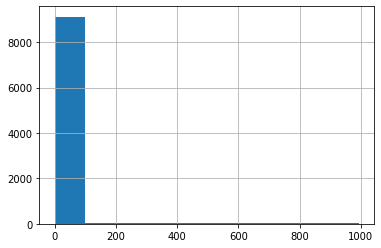

In [30]:
# Histogram of Size
df['Size'].hist()

Note down your observations for the plots made above. Which of these seem to have outliers?
Considering the above plots, there are outliers in the price and reviews features. The price of the applications and reviews about the software are somewhat correlation since they are both about applications.

<h3>7. Outlier treatment</h3>

<h4>7.1 Price</h4>

In [31]:
# Price: From the box plot, it seems like there are some apps with very high price. 
# A price of $200 for an application on the Play Store is very high and suspicious!
# 1
df[df['Price'] > 200].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1.5,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1.8,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8.7,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up


In [32]:
len(df[df['Price'] > 200])

15

In [33]:
#2. drop the rows above
df.drop(df[df['Price'] > 200].index, inplace=True)

In [34]:
# Check that rows are actually dropped.
df[df['Price'] > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


<h4>7.2 Reviews </h4>

In [35]:
# Reviews: Very few apps have very high number of reviews.
df[df['Reviews'] > 2000000].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,0.0,100000000,Free,0.0,Teen,Books & Reference,"August 1, 2018",0M,0M
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,0.0,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",0M,0M
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,0.0,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",0M,0M
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,0.0,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",0M,0M
340,Gmail,COMMUNICATION,4.3,4604324,0.0,1000000000,Free,0.0,Everyone,Communication,"August 2, 2018",0M,0M


In [36]:
# Number of records with over 2 millions reviews.
len(df[df['Reviews'] > 2000000])

453

In [37]:
# Drop records having more than 2 million reviews.
df.drop(df[df['Reviews'] > 2000000].index, inplace=True)

In [38]:
# Check
df[df['Reviews'] > 2000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


<h4>7.3 Installs </h4>

In [39]:
# There seems to be some outliers in this field too.
df['Installs'].describe()

count    8.885000e+03
mean     6.267379e+06
std      3.539960e+07
min      5.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [40]:
# 1. Find out different percentiles: 10, 25, 50, 90, 95, 99
df['Installs'].quantile([.1, .25, .5, .7, .75, .9, .95, .99])

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.75      5000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

In [41]:
q1 = df['Installs'].quantile(.25)
q3 = df['Installs'].quantile(.75)
iqr = q3 - q1

upper_bound = q3 + 1.5*iqr
lower_bound = q1 - 1.5*iqr

df_outliers = df[~df['Installs'].between(lower_bound, upper_bound)]

In [42]:
# Total outliers rows
len(df_outliers)

389

In [43]:
# With outliers
len(df)

8885

In [44]:
#Decide a threshold as cutoff for outlier and drop records having values more than that.
df.drop(df_outliers.index, inplace=True)

In [45]:
# Without outliers
len(df)

8496

<h3>8. Bivariate analysis</h3>
Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

<h4>8.1 Scatter plot/joinplot for Rating vs. Price</h4>

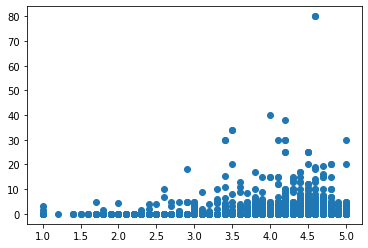

In [46]:
plt.scatter(df['Rating'], df['Price'])

What pattern do you observe? Does rating increase with price?
The rating seems to increase as the price the application goes up. 

<h4>8.2 Scatter plot/joinplot for Rating vs. Size</h4>

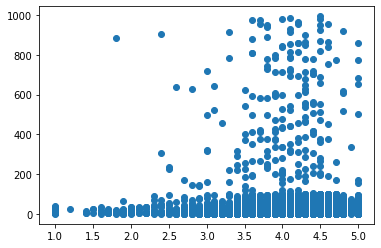

In [47]:
plt.scatter(df['Rating'], df['Size'])

Are heavier apps rated better?
Heavier applications are rated better. Bigger size could indicates more features in the applications...hence more ratings.

<h4>8.3 Scatter plot/joinplot for Rating vs. Reviews</h4>

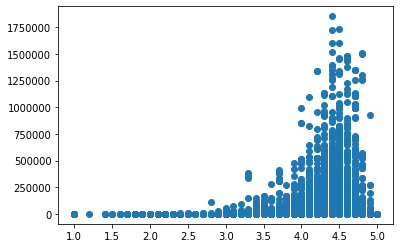

In [48]:
plt.scatter('Rating', 'Reviews', data=df)

Does more review mean a better rating always?
The plot seems to indicate that more reviews is translated to good/better reviews.

<h4>8.4 Boxplot for Rating vs. Content Rating</h4>

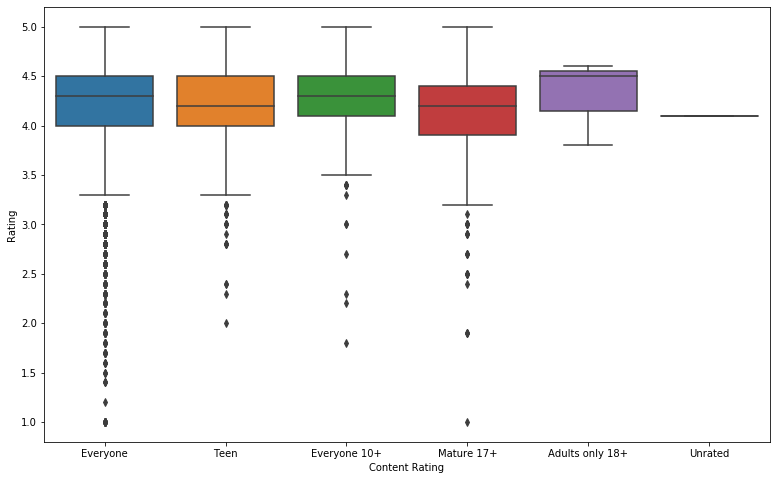

In [49]:
#df[['Content Rating', 'Rating']].boxplot()
plt.figure(figsize=(13,8))
sns.boxplot('Content Rating', 'Rating', data=df)

Is there any difference in the ratings? Are some types liked better?

<h4>8.5 Boxplot for Ratings vs. Category</h4>

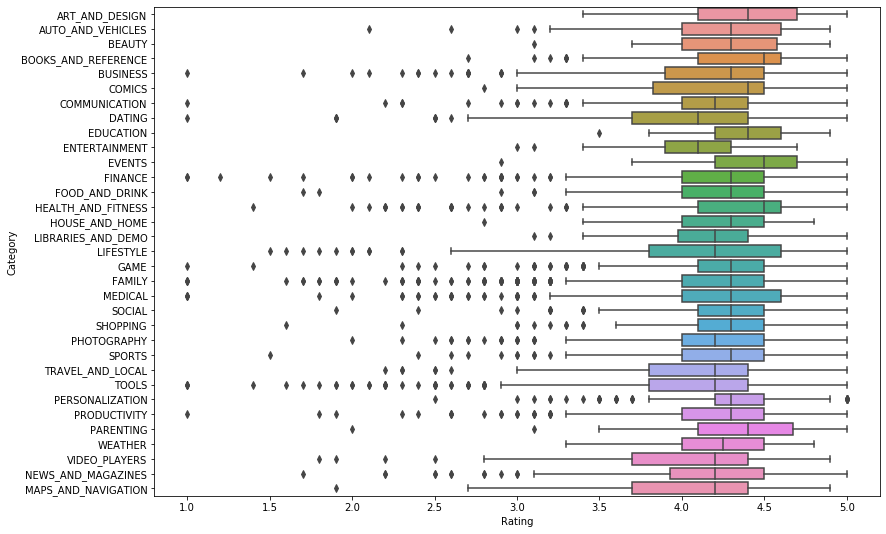

In [50]:
plt.figure(figsize=(13,9))
sns.boxplot('Rating', 'Category', data=df)

Which genre has the best ratings?

The genre events has the best rating as its median is 4.5 which more or less above the max of the all the rest of the genres.


<h3>9. Data preprocessing</h3>

In [51]:
# For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.
inp1 = df.copy()

<h4>9.1 Apply log transformation (np.log1p) to Reviews and Installs</h4>

In [52]:
# log transformatin of the features Reviews and Installs
inp1['Reviews'] = np.log1p(inp1['Reviews'])
inp1['Installs'] = np.log1p(inp1['Installs'])

<h4>9.2 Drop columns App, Last Updated, Current Ver, and Android Ver</h4>

In [53]:
# Drop the above-mentioned columns as they are not useful for prediction
inp1.drop(columns=['App', 'Last Updated', 'Current Ver', 'Android Ver'], inplace=True)

<h4>9.3 Get dummy columns for Category, Genres, and Content Rating</h4>

In [54]:
# Transform categorical features into dummy columns.
# Name of dataframe should be inp2.
inp2 = pd.get_dummies(inp1, columns=['Category', 'Genres', 'Content Rating', 'Type'])

<h3>10. Train test split and apply 70-30 split</h3>
Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.

In [55]:
# Split dataset into train and test set. Test size is 30%
df_train, df_test = train_test_split(inp2, test_size=.3, shuffle=True)

<h3>11. Separate the dataframes into X_train, y_train, X_test, and y_test</h3>

In [56]:
# Separate dependent and independent variables
X_train = df_train.drop(columns=['Rating'])
y_train = df_train['Rating']

X_test = df_test.drop(columns=['Rating'])
y_test = df_test['Rating']

In [57]:
X_train.columns

Index(['Reviews', 'Size', 'Installs', 'Price', 'Category_ART_AND_DESIGN',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       ...
       'Genres_Weather', 'Genres_Word', 'Content Rating_Adults only 18+',
       'Content Rating_Everyone', 'Content Rating_Everyone 10+',
       'Content Rating_Mature 17+', 'Content Rating_Teen',
       'Content Rating_Unrated', 'Type_Free', 'Type_Paid'],
      dtype='object', length=160)

<h3>12. Model building</h3>
Use linear regression as the technique

In [58]:
# Create a instance of the linear regression class
lr = LinearRegression()

In [59]:
# Fit the train set to the linear regression instance
lr.fit(X_train, y_train)

LinearRegression()

<h3>13. Make prediction on test set and report R2</h3>

In [60]:
# Predict new values using the test set
y_pred = lr.predict(X_test)

In [61]:
# R-squarred score
r2_score(y_test, y_pred)

0.15478245903751198